In [28]:
import pandas as pd

In [29]:
import numpy as np

In [30]:
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('vehicles.csv')

In [5]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [6]:
data.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [7]:
data.drop_duplicates(inplace = True)

In [9]:
data.isnull().any()

id              False
url             False
region          False
region_url      False
price           False
year             True
manufacturer     True
model            True
condition        True
cylinders        True
fuel             True
odometer         True
title_status     True
transmission     True
VIN              True
drive            True
size             True
type             True
paint_color      True
image_url        True
description      True
county           True
state           False
lat              True
long             True
posting_date     True
dtype: bool

In [11]:
data.isnull().sum()/data.shape[0]

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
image_url       0.000159
description     0.000164
county          1.000000
state           0.000000
lat             0.015342
long            0.015342
posting_date    0.000159
dtype: float64

In [13]:
data.description.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: description, dtype: object

In [18]:
data.cylinders = pd.to_numric(data.cylinders, errors = 'coerce')

AttributeError: module 'pandas' has no attribute 'to_numric'

In [19]:
data.cylinders.value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

<AxesSubplot:>

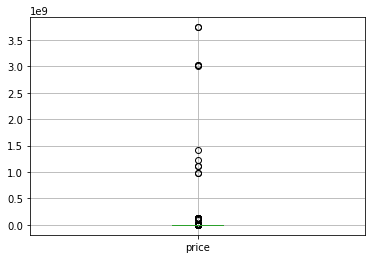

In [35]:
data.boxplot('price')

<AxesSubplot:>

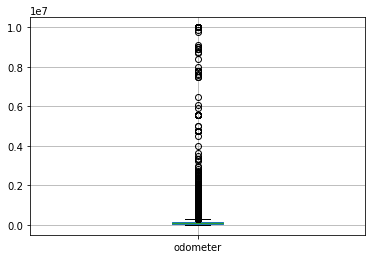

In [36]:
data.boxplot('odometer')

In [26]:
data.price.max()

3736928711

In [27]:
data.odometer.max()

10000000.0

In [34]:
data_outliers = data[(data.price < data.price.quantile(.995)) & (data.price > data.price.quantile(.005)) & (data.price != 0) & (data.odometer != 0)]
data_outliers = data_outliers[(data_outliers.odometer < data_outliers.odometer.quantile(.995)) & (data_outliers.odometer > data_outliers.odometer.quantile(.005))]

In [42]:
data_outliers[['price', 'odometer, cylinders']].hist()

KeyError: "['odometer, cylinders'] not in index"

In [44]:
data_outliers.isnull().sum()/data_outliers.shape[0]

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.002673
manufacturer    0.037691
model           0.011024
condition       0.381215
cylinders       0.404407
fuel            0.005893
odometer        0.000000
title_status    0.018443
transmission    0.003779
VIN             0.382921
drive           0.302921
size            0.716753
type            0.215013
paint_color     0.293294
image_url       0.000000
description     0.000005
county          1.000000
state           0.000000
lat             0.008608
long            0.008608
posting_date    0.000000
dtype: float64